**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.impute import KNNImputer

**Пути к директориям и файлам**

In [2]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

In [3]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [6]:
df_train.corr()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.000000,0.066245,0.188524,0.186531,0.062218,-0.015407,-0.101787,-0.066877,0.032082,0.386481,0.584819,-0.037832,-0.101375
Tax Liens,0.066245,1.000000,-0.005360,0.009109,-0.002410,0.595339,0.052446,0.057360,-0.007835,-0.010195,0.027211,0.010581,0.024368
Number of Open Accounts,0.188524,-0.005360,1.000000,0.144819,0.023897,-0.017813,-0.032740,-0.019130,0.001346,0.267325,0.413904,0.016095,0.028884
Years of Credit History,0.186531,0.009109,0.144819,1.000000,0.029247,0.071259,-0.015375,0.085699,0.010623,0.217856,0.191978,-0.015683,-0.020567
Maximum Open Credit,0.062218,-0.002410,0.023897,0.029247,1.000000,-0.004750,-0.003849,-0.011650,-0.002334,0.088090,0.010197,-0.009136,-0.014275
Number of Credit Problems,-0.015407,0.595339,-0.017813,0.071259,-0.004750,1.000000,0.139905,0.730751,-0.008596,-0.124137,-0.042252,-0.018473,0.020088
Months since last delinquent,-0.101787,0.052446,-0.032740,-0.015375,-0.003849,0.139905,1.000000,0.162710,0.000459,-0.027198,-0.057702,-0.004395,0.002598
Bankruptcies,-0.066877,0.057360,-0.019130,0.085699,-0.011650,0.730751,0.162710,1.000000,-0.005987,-0.142849,-0.079579,-0.027488,0.001648
Current Loan Amount,0.032082,-0.007835,0.001346,0.010623,-0.002334,-0.008596,0.000459,-0.005987,1.000000,0.016672,-0.009382,-0.108552,-0.226522
Current Credit Balance,0.386481,-0.010195,0.267325,0.217856,0.088090,-0.124137,-0.027198,-0.142849,0.016672,1.000000,0.504964,-0.006159,-0.019522


**Заполнение пропусков**

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [8]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

**Принимаем Home Mortgage - за 0, Rent за 1, Own Home за 2, Have Mortgage за 3**

In [9]:
df_train['Home Ownership'] = df_train['Home Ownership'].map({'Home Mortgage':0, 'Rent':1,'Own Home':2,'Have Mortgage':3})

In [10]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

**Принимаем Short Term как 0 Long Term как 1**

In [11]:
df_train['Term'] = df_train['Term'].map({'Short Term':0, 'Long Term':1})

In [12]:
imputer = KNNImputer(n_neighbors=15)

In [13]:
df_train.loc[:,'Annual Income'] = imputer.fit_transform(df_train.loc[:,['Annual Income','Monthly Debt']])[:,0]

In [14]:
df_train.loc[:,'Bankruptcies'] = imputer.fit_transform(df_train.loc[:,['Bankruptcies','Number of Credit Problems']])[:,0]

In [15]:
df_train.loc[:,'Months since last delinquent'] = imputer.fit_transform(df_train.loc[:,['Months since last delinquent','Bankruptcies']])[:,0]

In [16]:
imputer = KNNImputer(n_neighbors=5)

In [17]:
df_train.loc[:,'Credit Score'] = imputer.fit_transform(df_train.loc[:,['Credit Score','Credit Default']])[:,0]

In [18]:
df_train.loc[:,'Credit Score']

0        749.0
1        737.0
2        742.0
3        694.0
4        719.0
         ...  
7495     697.0
7496    7410.0
7497     748.0
7498     723.0
7499     723.0
Name: Credit Score, Length: 7500, dtype: float64

In [19]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [20]:
df_train['Years in current job'] = df_train['Years in current job'].map({'< 1 year':0, '1 year':1,'2 years':2,'3 years':3,
                                                            '4 years':4,'5 years':5,'6 years':6,'7 years':7,
                                                            '8 years':8,'9 years':9,'10+ years':10})

In [21]:
df_train.loc[:,'Years in current job']=np.rint(imputer.fit_transform(df_train.loc[:,['Years in current job','Years of Credit History']])[:,0])

In [22]:
df_train.loc[:,'Years in current job']

0        6.0
1       10.0
2        8.0
3        6.0
4        8.0
        ... 
7495     0.0
7496     1.0
7497     6.0
7498     5.0
7499     4.0
Name: Years in current job, Length: 7500, dtype: float64

In [23]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [24]:
df_train['Purpose'] = df_train['Purpose'].map({'debt consolidation':0, 'other':1,'home improvements':2,'business loan':3,
                                                            'buy a car':4,'medical bills':5,'major purchase':6,'take a trip':7,
                                                            'buy house':8,'small business':9,'wedding':10,'moving':11,'educational expenses':12,'vacation':13,'renewable energy':14})

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [26]:
df_test.corr()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
Annual Income,1.000000,0.030393,0.132920,0.194559,0.183899,-0.011999,-0.088417,-0.053245,-0.005099,0.330581,0.501720,-0.046856
Tax Liens,0.030393,1.000000,-0.009228,0.004386,-0.014659,0.715545,-0.023596,0.016223,-0.004599,-0.010357,-0.004147,-0.013509
Number of Open Accounts,0.132920,-0.009228,1.000000,0.108705,0.190505,-0.029556,-0.073359,-0.039349,0.023073,0.223589,0.415060,0.004945
Years of Credit History,0.194559,0.004386,0.108705,1.000000,0.143173,0.072036,-0.069014,0.102102,-0.016172,0.214668,0.192880,0.006512
Maximum Open Credit,0.183899,-0.014659,0.190505,0.143173,1.000000,-0.060845,-0.051884,-0.067187,0.004267,0.667832,0.245732,-0.026126
Number of Credit Problems,-0.011999,0.715545,-0.029556,0.072036,-0.060845,1.000000,0.045304,0.642100,-0.018175,-0.097057,-0.047975,0.023367
Months since last delinquent,-0.088417,-0.023596,-0.073359,-0.069014,-0.051884,0.045304,1.000000,0.082228,-0.000945,-0.013392,-0.048131,-0.023403
Bankruptcies,-0.053245,0.016223,-0.039349,0.102102,-0.067187,0.642100,0.082228,1.000000,-0.006434,-0.119585,-0.055945,0.034879
Current Loan Amount,-0.005099,-0.004599,0.023073,-0.016172,0.004267,-0.018175,-0.000945,-0.006434,1.000000,0.007324,0.004710,-0.121867
Current Credit Balance,0.330581,-0.010357,0.223589,0.214668,0.667832,-0.097057,-0.013392,-0.119585,0.007324,1.000000,0.504670,-0.017820


In [27]:
imputer = KNNImputer(n_neighbors=15)

In [28]:
df_test.loc[:,'Annual Income'] = imputer.fit_transform(df_test.loc[:,['Annual Income','Monthly Debt']])[:,0]

In [29]:
df_test['Years in current job'] = df_test['Years in current job'].map({'< 1 year':0, '1 year':1,'2 years':2,'3 years':3,
                                                            '4 years':4,'5 years':5,'6 years':6,'7 years':7,
                                                            '8 years':8,'9 years':9,'10+ years':10})

In [30]:
df_test.loc[:,'Years in current job']=np.rint(imputer.fit_transform(df_test.loc[:,['Years in current job','Years of Credit History']])[:,0])

In [31]:
df_test.loc[:,'Bankruptcies'] = imputer.fit_transform(df_test.loc[:,['Bankruptcies','Number of Credit Problems']])[:,0]

In [32]:
df_test.loc[:,'Months since last delinquent'] = imputer.fit_transform(df_test.loc[:,['Months since last delinquent','Bankruptcies']])[:,0]

In [33]:
df_test.loc[:,'Credit Score'] = imputer.fit_transform(df_test.loc[:,['Credit Score','Current Loan Amount']])[:,0]

In [34]:
df_test['Purpose'] = df_test['Purpose'].map({'debt consolidation':0, 'other':1,'home improvements':2,'business loan':3,
                                                            'buy a car':4,'medical bills':5,'major purchase':6,'take a trip':7,
                                                            'buy house':8,'small business':9,'wedding':10,'moving':11,'educational expenses':12,'vacation':13,'renewable energy':14})

In [35]:
df_test['Home Ownership'] = df_test['Home Ownership'].map({'Home Mortgage':0, 'Rent':1,'Own Home':2,'Have Mortgage':3})

In [36]:
df_test['Term'] = df_test['Term'].map({'Short Term':0, 'Long Term':1})

In [37]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

In [38]:
df_train[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

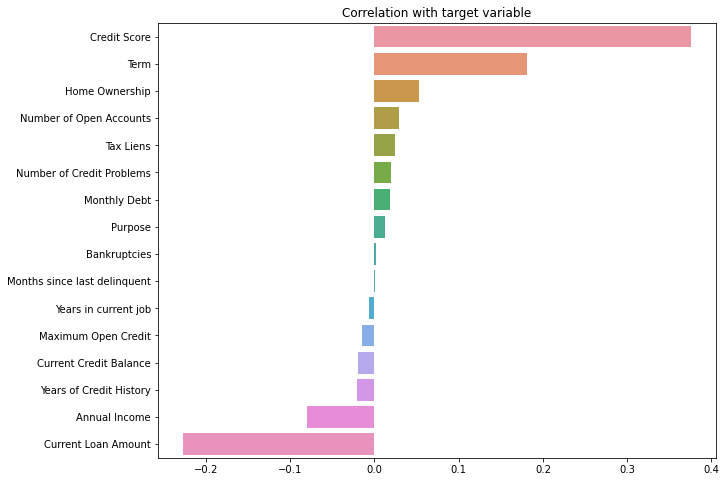

In [39]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

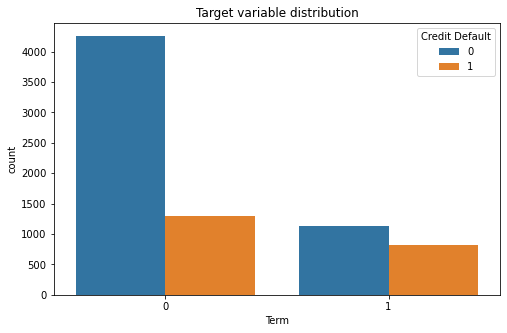

In [40]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Term',hue=TARGET_NAME, data=df_train)

plt.title('Target variable distribution')
plt.show()


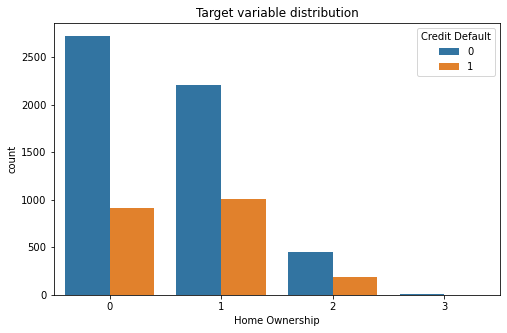

In [41]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Home Ownership',hue=TARGET_NAME, data=df_train)

plt.title('Target variable distribution')
plt.show()

**Построение базовых моделей**

In [42]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [43]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [44]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [45]:
import pandas as pd
import numpy as np
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,2,482087.0,6.0,0.0,11.0,26.3,685960.0,1.0,45.866667,1.0,0,0,99999999.0,47386.0,7914.0,749.0,0
1,2,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,28.400000,0.0,0,1,264968.0,394972.0,18373.0,737.0,1
2,0,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,28.400000,0.0,0,0,99999999.0,308389.0,13651.0,742.0,0
3,2,805068.0,6.0,0.0,8.0,22.5,147400.0,1.0,45.866667,1.0,0,0,121396.0,95855.0,11338.0,694.0,0
4,1,776264.0,8.0,0.0,13.0,13.6,385836.0,1.0,28.400000,0.0,0,0,125840.0,93309.0,7180.0,719.0,0


In [47]:
NUM_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies', 'Current Loan Amount',
                     'Current Credit Balance', 'Monthly Debt', 'Credit Score','Months since last delinquent']

CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES+CAT_FEATURE_NAMES

In [48]:
for colname in CAT_FEATURE_NAMES:
    df_train[colname] = df_train[colname].astype(str)

In [49]:
df_test.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,2500.00000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2500.000000,2500.000000
mean,0.61480,1.365274e+06,5.964400,0.035200,11.184400,18.325920,7.105704e+05,0.162000,35.756747,0.106800,0.534400,0.255600,1.215572e+07,2.963966e+05,18271.340000,1248.035360
std,0.67246,8.475815e+05,3.581545,0.386291,4.852774,7.254659,1.511983e+06,0.559894,15.013892,0.356994,1.478949,0.436285,3.226097e+07,3.783020e+05,11543.881469,1567.016934
min,0.00000,1.065330e+05,0.000000,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,0.00000,8.928528e+05,3.000000,0.000000,8.000000,13.400000,2.785860e+05,0.000000,33.000000,0.000000,0.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,715.333333
50%,1.00000,1.208708e+06,6.000000,0.000000,10.000000,17.000000,4.786760e+05,0.000000,36.466667,0.000000,0.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,734.833333
75%,1.00000,1.616544e+06,10.000000,0.000000,14.000000,22.100000,8.025985e+05,0.000000,36.466667,0.000000,0.000000,1.000000,5.225825e+05,3.663485e+05,24146.000000,748.000000
max,3.00000,1.497561e+07,10.000000,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,13.000000,1.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


In [50]:
def plot_outliers(df_train, df_test, col_name, hist = False):
    fig, ax = plt.subplots(1,3,figsize=(16,5))
    #ax[0].set_title(f'KDE for both datasets on {col_name}')
    ax[1].set_title('Train Dataset')
    ax[2].set_title('Test Dataset')
    sns.distplot(df_train[col_name], color='b', ax=ax[0], hist=hist, label='Train')
    sns.distplot(df_test[col_name], color='r', ax=ax[0], hist=hist, label='Test')
    sns.boxplot(df_train[col_name], ax=ax[1])
    sns.boxplot(df_test[col_name], color='r', ax=ax[2])
    plt.show()

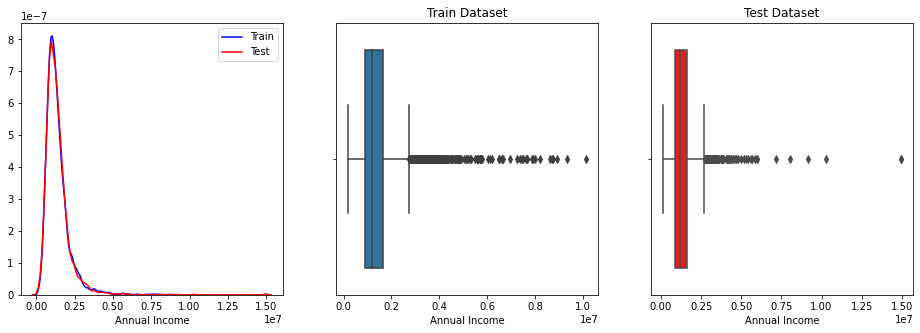

C:\Users\m.dubrovin\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\m.dubrovin\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


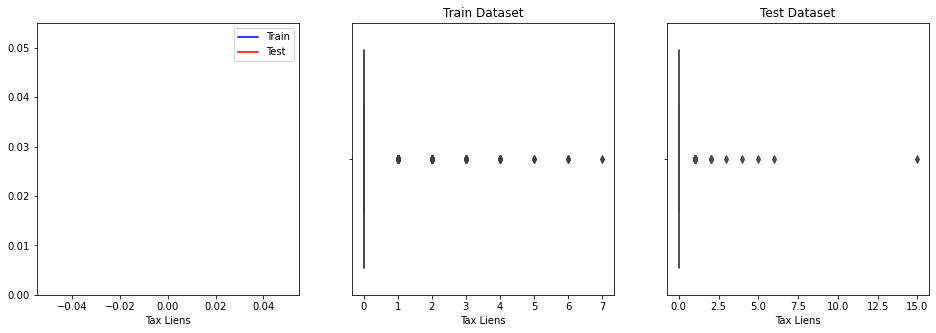

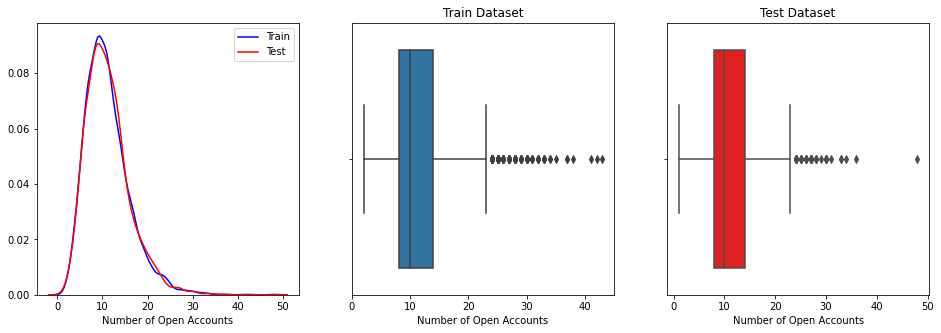

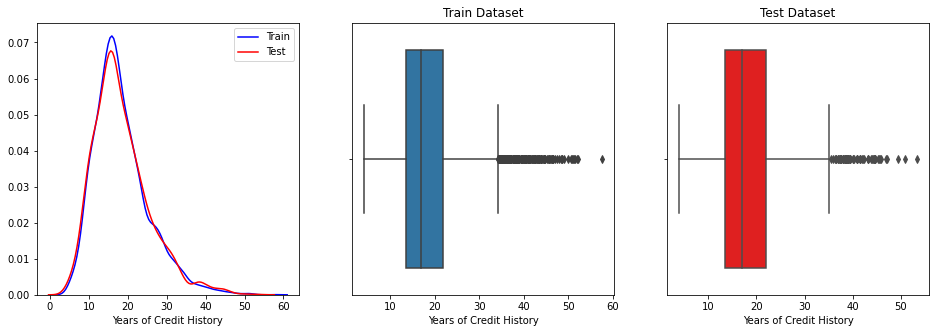

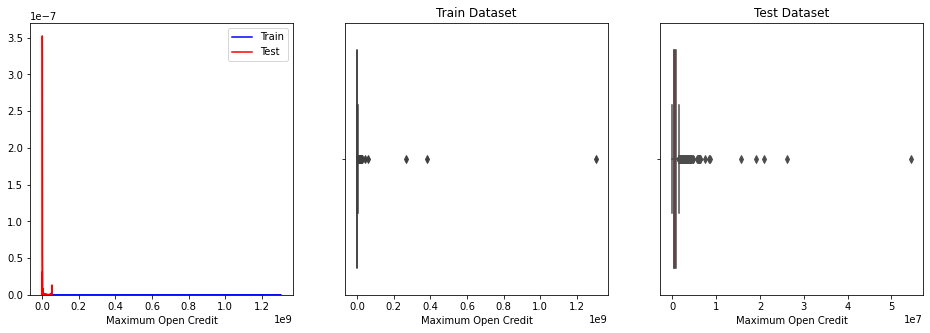

C:\Users\m.dubrovin\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\m.dubrovin\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


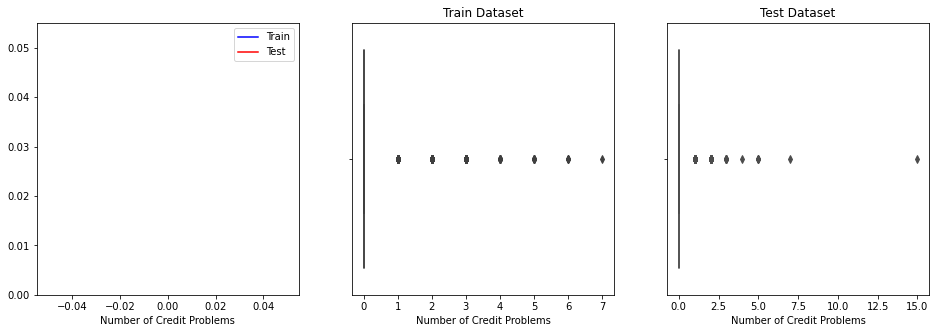

C:\Users\m.dubrovin\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\m.dubrovin\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


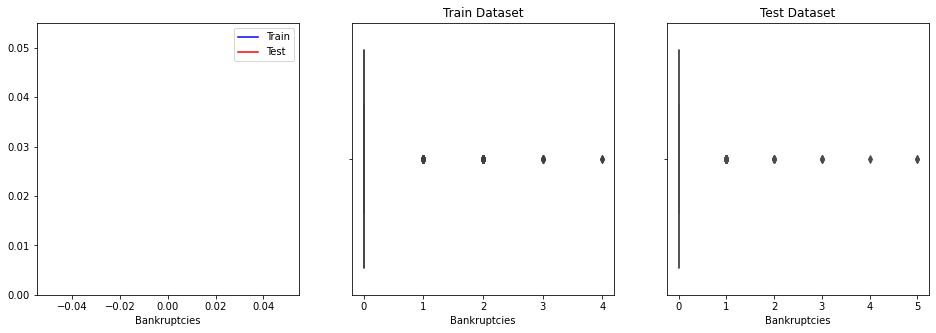

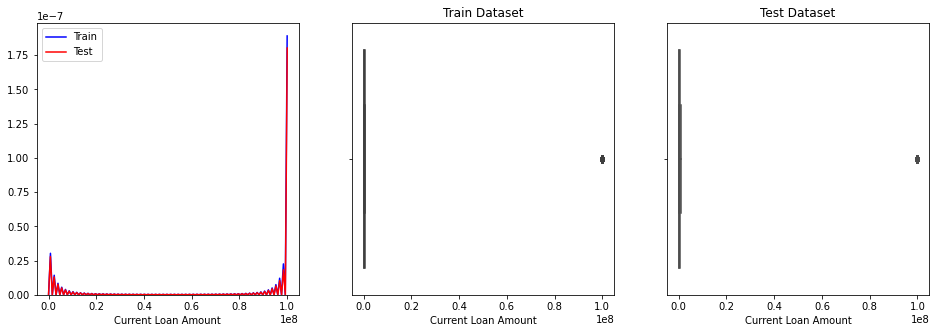

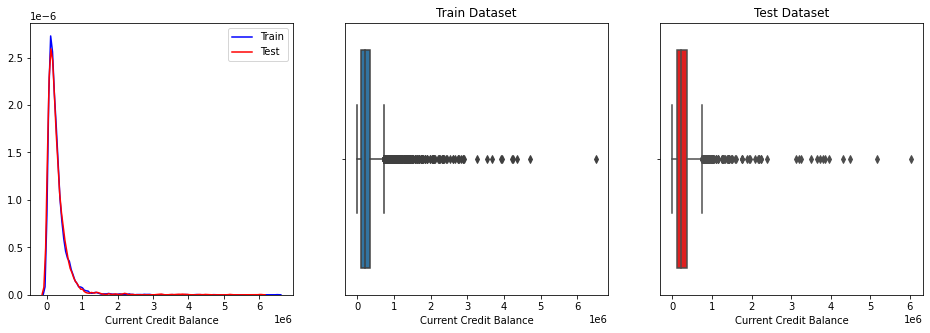

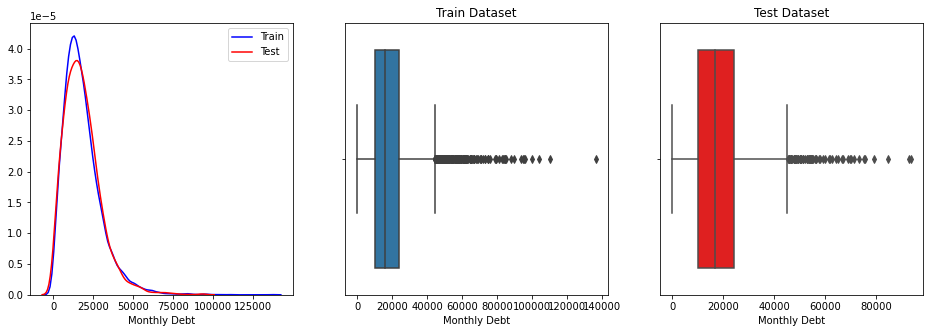

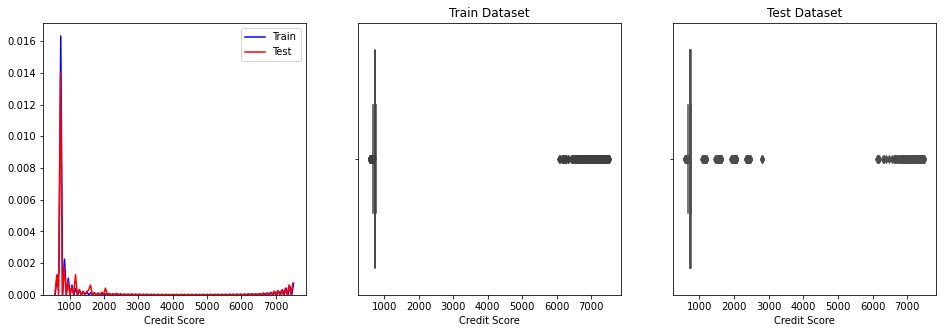

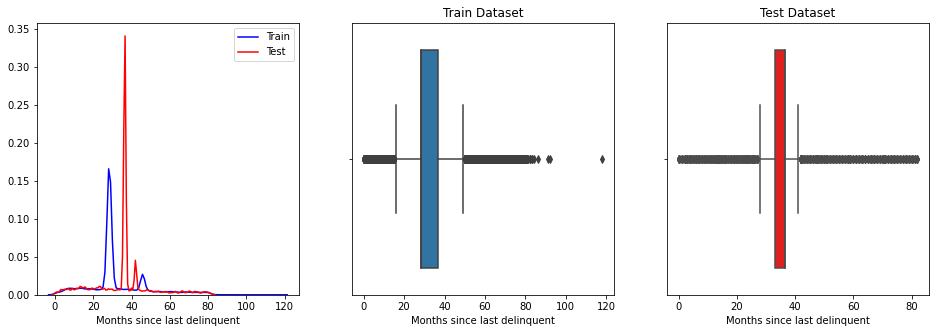

In [51]:
for col in NUM_FEATURE_NAMES:
    plot_outliers(df_train, df_test,col)

In [52]:
#df_train['ID'] = df_train.index
#df_test['ID'] = df_test.index

In [53]:
list_extraX=[]
list_extraX += np.where(df_train.loc[df_train['Current Loan Amount'].values>999998])[1].tolist() 
list_extraX = set(list_extraX )

In [54]:
list_extraX

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [55]:
#Удаление выбросов

df_train.drop(index=list_extraX , axis=0, inplace=True)
print(df_train.shape)

(7484, 17)


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

df_norm = df_test.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])
df_test = df_norm.copy()

df_norm = df_train.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df[SELECTED_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [60]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [61]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3755
1    2966
Name: Credit Default, dtype: int64

In [62]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [63]:
X_train

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Months since last delinquent,Home Ownership,Years in current job,Purpose,Term
1354,0.101031,-0.111073,-0.637381,-0.811646,-0.041302,-0.340556,-0.336775,-0.361198,-0.429423,0.309289,-0.235701,-0.257301,1,5.0,0,0
2330,-0.270806,3.567128,2.823240,1.758035,-0.047000,3.670018,-0.336775,-0.370958,-0.665507,0.054433,-0.223897,-0.257301,1,10.0,0,0
4663,-0.673500,-0.111073,0.176883,-0.754857,-0.009480,-0.340556,-0.336775,-0.364908,-0.713645,-0.898407,-0.235701,-0.257301,1,3.0,2,0
5194,-0.297365,-0.111073,0.380449,-0.371535,-0.035062,-0.340556,-0.336775,-0.364319,-0.161944,-0.141049,4.358816,1.929040,0,7.0,0,0
5303,-1.017581,-0.111073,0.584014,0.593870,-0.044706,1.664731,2.547004,-0.365953,-0.684703,-0.241935,-0.256531,-1.845001,0,10.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.754063,-0.111073,0.176883,0.806827,-0.033222,1.664731,2.547004,-0.361451,-0.554162,-0.036809,-0.221119,-0.218259,0,10.0,0,0
1044,1.486866,-0.111073,0.991146,1.985189,-0.024022,-0.340556,-0.336775,-0.360375,0.486271,2.774831,-0.240422,-0.257301,0,10.0,0,1
6668,-0.677075,-0.111073,-1.044513,-0.896828,-0.040508,-0.340556,-0.336775,-0.364099,-0.525997,-0.942434,-0.268335,0.237228,0,4.0,0,1
4527,0.619853,-0.111073,0.176883,-1.180771,-0.038684,-0.340556,-0.336775,-0.351942,-0.558528,0.662851,3.907488,-0.673747,0,5.0,0,1


In [64]:
#train = pd.concat([X_train, y_train], axis=1)
#test = pd.concat([X_test, y_test], axis=1)

In [65]:
#df.to_csv(TRAIN_FULL_PATH, index=False, encoding='utf-8')
#train.to_csv(TRAIN_PART_PATH, index=False, encoding='utf-8')
#test.to_csv(TEST_PART_PATH, index=False, encoding='utf-8')

In [66]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      3755
           1       0.70      0.51      0.59      2966

    accuracy                           0.69      6721
   macro avg       0.69      0.67      0.67      6721
weighted avg       0.69      0.69      0.68      6721

TEST

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1621
           1       0.53      0.50      0.52       625

    accuracy                           0.74      2246
   macro avg       0.67      0.67      0.67      2246
weighted avg       0.73      0.74      0.74      2246

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1344  277
1                310  315


C:\Users\m.dubrovin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      3755
           1       0.79      0.70      0.74      2966

    accuracy                           0.78      6721
   macro avg       0.78      0.77      0.78      6721
weighted avg       0.78      0.78      0.78      6721

TEST

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1621
           1       0.43      0.44      0.44       625

    accuracy                           0.68      2246
   macro avg       0.61      0.61      0.61      2246
weighted avg       0.68      0.68      0.68      2246

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1251  370
1                348  277


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [70]:
#model_catb_ = catb.CatBoostClassifier(silent=True, random_state=21, cat_features=CAT_FEATURE_NAMES )
model_catb = catb.CatBoostClassifier(class_weights=[1, 1.27], silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3755
           1       0.96      0.94      0.95      2966

    accuracy                           0.95      6721
   macro avg       0.95      0.95      0.95      6721
weighted avg       0.95      0.95      0.95      6721

TEST

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1621
           1       0.65      0.64      0.64       625

    accuracy                           0.80      2246
   macro avg       0.76      0.75      0.75      2246
weighted avg       0.80      0.80      0.80      2246

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1406  215
1                226  399


In [72]:
params = {'n_estimators':[200,500,1000],
          'max_depth':[6, 7, 8]}

In [73]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [74]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

C:\Users\m.dubrovin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Wall time: 2min 56s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000200316FE490>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000]},
                   scoring='f1')

In [75]:
rs.best_params_

{'n_estimators': 500, 'max_depth': 6}

In [76]:
rs.best_score_

0.6420372496824817

In [77]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=6,
                                      l2_leaf_reg=10,
                                      silent=True,class_weights=[1, 1.23])
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3755
           1       0.90      0.86      0.88      2966

    accuracy                           0.90      6721
   macro avg       0.90      0.89      0.89      6721
weighted avg       0.90      0.90      0.90      6721

TEST

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1621
           1       0.64      0.67      0.66       625

    accuracy                           0.80      2246
   macro avg       0.76      0.76      0.76      2246
weighted avg       0.81      0.80      0.81      2246

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1390  231
1                208  417


In [78]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

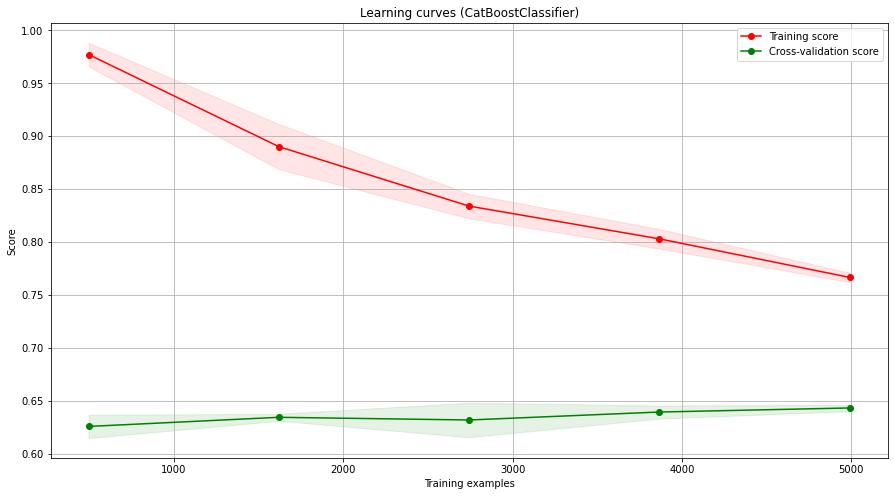

In [79]:
show_learning_curve_plot(final_model, X, y)

In [82]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.4, 0.7, 15):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

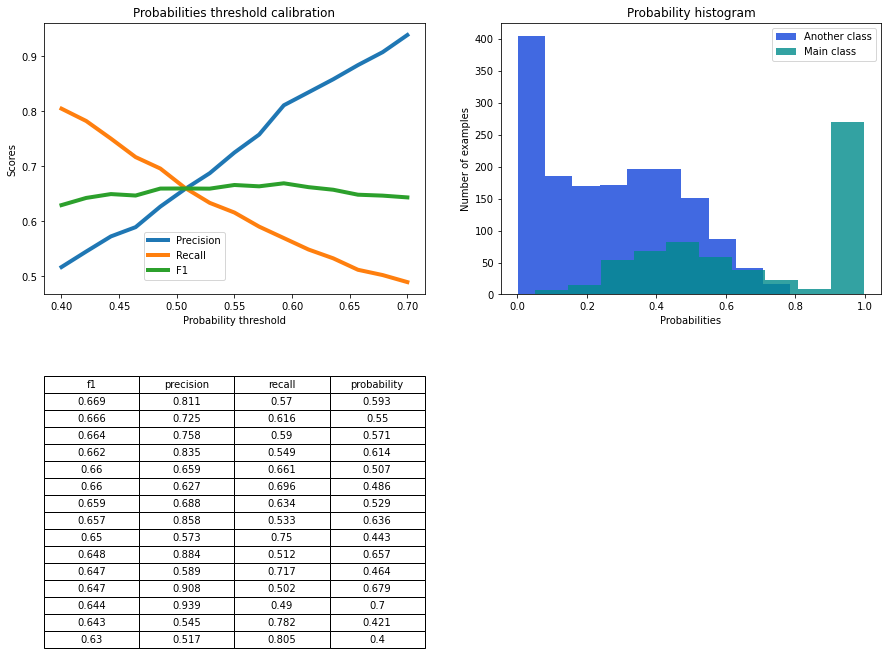

In [83]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

In [84]:
threshold_prob = 0.593

In [85]:
final_model = catb.CatBoostClassifier(n_estimators=1000, max_depth=5,
                                      l2_leaf_reg=10,
                                      silent=True,class_weights=[1, 1.2])
final_model.fit(X.iloc[:,:], y)

y_test_pred_probs = final_model.predict_proba(X.iloc[:,:])
predict_train = np.array([1 if x>=threshold_prob else 0 for x in y_test_pred_probs[:,1]])

print(classification_report(y,predict_train))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5376
           1       0.99      0.56      0.72      2108

    accuracy                           0.88      7484
   macro avg       0.92      0.78      0.82      7484
weighted avg       0.89      0.88      0.86      7484



In [86]:
# 4.3. Генерация  и  экспорт прогноза
y_pred_probas = final_model.predict_proba(df_test[SELECTED_FEATURE_NAMES].iloc[:,:])
y_pred = np.array([1 if x>=threshold_prob else 0 for x in y_pred_probas[:,1]])
y_pred = pd.DataFrame(y_pred, columns=['NEXT_MONTH_DEFAULT'])

print(y_pred.shape)

(2500, 1)


In [87]:
y_pred['ID'] = y_pred.index

In [88]:
y_pred = y_pred[['ID','NEXT_MONTH_DEFAULT']]

In [89]:
y_pred

,ID,NEXT_MONTH_DEFAULT
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
2495,2495,0
2496,2496,0
2497,2497,1
2498,2498,0


In [90]:
#Экспорт результатов
import csv
filename = 'Dubrovin_predictions.csv'
y_pred.to_csv(filename, index=None)